# Experiments for Bank Marketing

## 1 Basic performance for the Bank Marketing dataset

First we will read the dataset.
The labels in this dataset are 1 or 2 (mostly 1).

(For Figures S.2 and S.3 in the supplementary material,
the shuffling commands should be uncommented.)

In [1]:
# Parameters:
N_train = 10000  # the size of the training set

import time
start = time.time()

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
bank = fetch_openml(name='bank-marketing', version=1)
## Shuffling the objects only:
# rg = np.random.default_rng(2021)
# rg.shuffle(bank.data)     # permute the objects
N_total = bank.data.shape[0]   # the size of the dataset
N_test = N_total - N_train

# Other views of the data:
X_train = bank.data[0:N_train]  # matrix of training objects
yy_train = bank.target[0:N_train].astype(int)    # vector of training labels (as integes)
X_test = bank.data[N_train:]   # matrix of test objects
yy_test = bank.target[N_train:].astype(int)     # vector of tets labels (as integers)

# turning the labels into 0 (former 1) or 1 (former 2)
y_train = np.empty(N_train)
y_test = np.empty(N_test)
for i in range(N_train):
  if yy_train[i]==2:
    y_train[i] = 1
  else:
    y_train[i] = 0
for i in range(N_test):
  if yy_test[i]==2:
    y_test[i] = 1
  else:
    y_test[i] = 0

print("Percentage of successful calls in the training set:", np.mean(y_train))
print("Percentage of successful calls in the test set:", np.mean(y_test))

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Percentage of successful calls in the training set: 0.035
Percentage of successful calls in the test set: 0.14026866604186192
Time elapsed: 1.8195347785949707


Now let us normalize the features by applying StandardScaler.
(This does not change the results.)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let us use the standard prediction algorithms in scikit-learn that are able to produce probabilities.
(In the figures we use Random Forest.)

### 1.1 Neural nets

In [3]:
start = time.time()

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2021).fit(X_train,y_train)
mlp.fit(X_train,y_train)

# Evaluating the quality:
y_pred = mlp.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of errors: 5067
Confusion matrix:
[[29272  1000]
 [ 4067   872]]
Time elapsed: 24.75852060317993


C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 1.2 Support vector machines

We only use kernel (not linear) SVM.

In [4]:
start = time.time()

from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)  # max_iter default=1000

# Evaluating the quality:
y_pred = svm.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 4914
Confusion matrix:
[[30264     8]
 [ 4906    33]]
Time elapsed: 1.7878508567810059


### 1.3 Decision trees

In [5]:
start = time.time()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

# Evaluating the quality:
y_pred = tree.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 4931
Confusion matrix:
[[29467   805]
 [ 4126   813]]
Time elapsed: 0.11230707168579102


### 1.4 Ensemble methods

First Random Forest.

In [6]:
start = time.time()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = forest.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 4814
Confusion matrix:
[[30070   202]
 [ 4612   327]]
Time elapsed: 1.0186128616333008


Next Gradient Boosting.

In [7]:
start = time.time()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = gb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 4782
Confusion matrix:
[[29966   306]
 [ 4476   463]]
Time elapsed: 1.0605213642120361


### 1.5 Naive Bayes

In [8]:
start = time.time()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

# Evaluating the quality:
y_pred = nb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9504
Confusion matrix:
[[23763  6509]
 [ 2995  1944]]
Time elapsed: 0.0767357349395752


### 1.6 Logistic regression

In [9]:
start = time.time()

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000).fit(X_train, y_train)  # default 100

# Evaluating the quality:
y_pred = logistic.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred))

print('Confusion matrix:')
CM = confusion_matrix(y_test, y_pred)
print(CM)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 7178
Confusion matrix:
[[26504  3768]
 [ 3410  1529]]
Time elapsed: 0.04736495018005371


## 2 The log loss of standard algorithms

We need to modify the log loss function, as in scikit-learn (but for a different $\epsilon$).
Let us also define the Bernoulli distribution.

In [10]:
epsilon = 10**(-2)  # the safety threshold for the log loss function; default in this paper: 10**(-2)
def truncate(p):
  if p<epsilon:
    return epsilon
  else:
    if p>1-epsilon:
      return 1-epsilon
    else:
      return p
# The Bernoulli distribution:
def Bern(p,y):  # y is 0 or 1
  if y==1:
    return p
  else:
    return 1-p

First we test Neural Nets.

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=2021).fit(X_train,y_train)

# Evaluating the quality:
y_pred = mlp.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = mlp.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

C:\Users\uhac013\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of errors: 5067 out of 35211
32993.25230096034 with 0 infinities; modified loss: 18451.99780684878


Next SVM.

In [12]:
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, y_train)  # max_iter default=1000

# Evaluating the quality:
y_pred = svm.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = svm.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

Number of errors: 4914 out of 35211
14321.893711711075 with 0 infinities; modified loss: 14321.88000013361


Next Decision Trees.

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

# Evaluating the quality:
y_pred = tree.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = tree.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

Number of errors: 4939 out of 35211
0.0 with 4939 infinities; modified loss: 23049.1793155496


Next Gradient Boosting.

In [14]:
start = time.time()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2021).fit(X_train, y_train)  # default: n_estimators=100

# Evaluating the quality:
y_pred = gb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = gb.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 4782 out of 35211
21459.86884987374 with 0 infinities; modified loss: 16788.19924228183
Time elapsed: 1.2379822731018066


Next Naive Bayes.

In [15]:
start = time.time()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train,y_train)

# Evaluating the quality:
y_pred = nb.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = nb.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
num_errors = 0   # initialization of the number of errors
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
  if predicted < 0.5:
    num_errors += 1
  if predicted == 0.5:
    print('Exactly 0.5 predicted!')
    if y_test[n]==1:
      num_errors += 1
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)
print(num_errors,"errors")

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 9504 out of 35211
29895.174437170135 with 185 infinities; modified loss: 27682.466500516854
9504 errors
Time elapsed: 0.2739260196685791


Next, Logistic Regression.

In [16]:
start = time.time()

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=2021).fit(X_train, y_train)

# Evaluating the quality:
y_pred = logistic.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = logistic.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log(predicted)
  mod_cum_loss += -np.log(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 7178 out of 35211
21336.808458947806 with 0 infinities; modified loss: 19599.229887253714
Time elapsed: 0.3633239269256592


Finally, Random Forest.

In [17]:
start = time.time()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2021).fit(X_train, y_train)
# forest = RandomForestClassifier(random_state=2021,n_estimators=100).fit(X_train, y_train)  # default: n_estimators=100

# Evaluating the quality:
y_pred = forest.predict(X_test)
print("Number of errors:",np.sum(y_test!=y_pred),'out of',y_test.size)

p_pred = forest.predict_proba(X_test)[:,1]  # probability of 1

cum_loss = 0  # initialization of the loss
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print(cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Number of errors: 4814 out of 35211
4130.607630292967 with 1492 infinities; modified loss: 7185.116696764476
Time elapsed: 1.7349863052368164


## 3 Choosing the calibrating functions

The first option is the quadratic calibrating functions.
It is used in the suplementary material only.

In [18]:
# The quadratic calibrator:
def quad_cal(p,theta):
  return p + theta*p*(1-p)

# My family of calibrators:
Ncal = 5  # the number of calibrators
def my_cal(p,k):
  if k==0:
    return quad_cal(p,0)
  if k==1:
    return quad_cal(p,1)
  if k==2:
    return quad_cal(p,-1)
  if k==3:
    return quad_cal(p,0.5)
  if k==4:
    return quad_cal(p,-0.5)
  else:
    print("my_cal failure")

The other option used in the paper is Cox's family of calibrating functions.

In [19]:
alphas = [0, 1, -1]  # make sure to start from 0 (the neutral value)
betas = [1, 0.5, 2]  # make sure to start from 1 (the neutral value)
Ncal_alpha = len(alphas)
Ncal_beta = len(betas) # the number of beta calibrators
Ncal = Ncal_alpha * Ncal_beta

def Cox(p,alpha,beta):
  return p**beta*np.exp(alpha) / (p**beta*np.exp(alpha) + (1-p)**beta)

def set_theta(index):  # finding theta=(alpha,beta) from its index
  result = np.empty(2)  # initializing the result
  current_index = index
  result[0] = current_index % Ncal_alpha  # alpha is at index 0
  current_index = current_index // Ncal_alpha
  result[1] = current_index % Ncal_beta  # beta is at index 1
  current_index = current_index // Ncal_beta
  if current_index!=0:
    print('Error')
  return result

def my_cal(p,k):
  theta = set_theta(k)
  return Cox(p,theta[0],theta[1])

## 4 Our test martingales

The following cell implements the Composite Jumper (CJ) martingale (Figure 2).
It can also be used for drawing several Simple Jumper (SJ) martingales
(left panel of Figure S.5 in the supplementary material).

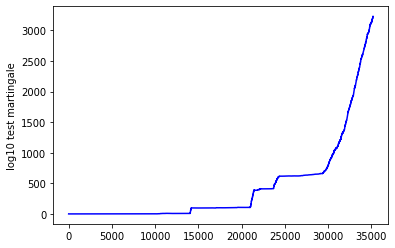

Final values of SJs on the log scale: [3208.03471523 3232.52354346 3210.98370631]
Final value of CJ on the log scale: 3231.7453922057125
Time elapsed: 12.256955623626709


In [20]:
import time   # for timing
start = time.time()

# Parameters
# pi = 0.5  # assumed but not used explicitly
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates
NJ = len(Jrates)

# The calibrators were defined in the previous cells.

# Arithmetic average of numbers given on the log10 scale:
def log_mean(x):
  m = np.max(x)
  return m+np.log10(np.mean(np.exp(np.log(10)*(x-m))))

# initializing the SJ and CJ test martingales on the log scale (including the initial value of 0):
log_SJ_martingale = np.zeros((NJ,(N_test+1)))
log_CJ_martingale = np.zeros(N_test+1)

# Processing the dataset
for J_index in range(NJ):  # going over all jumping rates
  Jrate = Jrates[J_index]  # the current jumping rate
  MartCap = np.zeros(Ncal)  # the normalized capital in each state (after normalization at the previous step)
  MartCap[0] = 1  # the initial distribution for each jumping rate is concentrated at 0
  for n in range(N_test):  # going over the test set
    # Jump mixing starts
    Capital = np.sum(MartCap[:])  # redundant; we know that Capital = 1
    MartCap[:] = (1-Jrate)*MartCap[:] + (Jrate/Ncal)*Capital
    # Jump mixing ends
    ppp = truncate(p_pred[n])   # base prediction
    for k in range(Ncal):
      new_ppp = my_cal(ppp,k)    # our new prediction
      # at this point we know that Bern(ppp,y_test[n])!=0
      MartCap[k] *= Bern(new_ppp,y_test[n]) / Bern(ppp,y_test[n])
    increase = np.sum(MartCap[:])   # relative increase in our capital
    log_SJ_martingale[J_index,n+1] = log_SJ_martingale[J_index,n] + np.log10(increase)
    MartCap[:] /= increase
  # plt.plot(log_SJ_martingale[J_index,:],label='jumping rate: '+str(Jrate))  # for SJ martingales

for n in range(N_test+1):
  log_CJ_martingale[n] = log_mean([0,log_mean(log_SJ_martingale[:,n])])   # 1 becomes 0 on the log scale

plt.plot(log_CJ_martingale,c='b')   # for CJ martingale
plt.ylabel('log10 test martingale')  # choose singular or plural
# plt.legend()  # for SJ martingales
# plt.savefig("BM_SJs.pdf", bbox_inches='tight')
plt.show()

# Interesting values:
print("Final values of SJs on the log scale:", log_SJ_martingale[:,N_test])
print("Final value of CJ on the log scale:", log_CJ_martingale[N_test])

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

## 5 Turning the test martingale into a predictive system

The following cell implements Algorithm 2 with $\pi=0$ and for a fixed jumping rate J.
This is used in the supplementary material (Figure S.6).

In [21]:
import time   # for timing
start = time.time()

# Parameters
Jrate = 10**(-4)  # the jumping rate; for 10**(-2) and 10**(-4) in the paper

# Calibrators were defined in Section 3.

# initializing the predicted probabilities:
p_prime = np.empty(N_test)

# Processing the dataset
weight = np.zeros(Ncal)  # the weight of each state
weight[0] = 1
for n in range(N_test):
  # Jump mixing starts
  Capital = np.sum(weight[:])
  weight[:] /= Capital  # normalization
  weight[:] = (1-Jrate)*weight[:] + Jrate/Ncal
  # Jump mixing ends
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = 0    # initializing the new prediction
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    new_ppp += cal_ppp_k * weight[k]  # accumulating predictions calibrated by the calibrators
  p_prime[n] = new_ppp
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    weight[k] *= Bern(cal_ppp_k,y_test[n])

cum_loss = 0  # initialization of the loss for the base predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Base:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

cum_loss = 0  # initialization of the loss for the protected predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss (never used)
for n in range(N_test):
  predicted = Bern(p_prime[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Protected:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Base: 4130.607630292967 with 1492 infinities; modified loss: 7185.116696764476
Protected: 3974.132990456682 with 0 infinities; modified loss: 3979.4268206598445
Time elapsed: 4.957041501998901


Next we implement Algorithm 2 (Composite Jumper predictor) for $\pi=0.5$ and for a range of jumping rates.

In [22]:
import time   # for timing
start = time.time()

# Parameters
pi = 0.5  # the prior weight of the passive elementary predictor
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates; canonical: 0.01, 0.001, 0.0001
NJ = len(Jrates)

# Calibrators were defined in Section 3.

# initializing the predicted probabilities:
p_prime = np.empty(N_test)

# Processing the dataset
P_weight = pi    # amount set aside (passive weight)
A_weight = np.zeros((NJ,Ncal))  # the weight of each active state
A_weight[:,0] = (1-pi)/NJ    # initial weights
for n in range(N_test):  # going through all test observations
  # Jump mixing starts
  for J_index in range(NJ):
    Capital = np.sum(A_weight[J_index,:])  # active capital for this jumping rate
    Jrate = Jrates[J_index]
    A_weight[J_index,:] = (1-Jrate)*A_weight[J_index,:] + Capital*Jrate/Ncal
  # Jump mixing ends
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = ppp*P_weight    # initializing the new prediction to its passive component
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    for J_index in range(NJ):
      new_ppp += cal_ppp_k * A_weight[J_index,k]  # accumulating predictions calibrated by the calibrators
  p_prime[n] = new_ppp   # my prediction
  P_weight *= Bern(ppp,y_test[n])  # updating the passive capital
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    for J_index in range(NJ):
      A_weight[J_index,k] *= Bern(cal_ppp_k,y_test[n])  # updating the active capital
  Capital = P_weight + np.sum(A_weight[:,:])  # the overall weight
  P_weight /= Capital  # normalization of the passive weight
  A_weight[:,:] /= Capital  # normalization of the active weights

from sklearn import metrics

cum_loss = 0  # initialization of the loss of the base predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
num_errors = 0   # initialization of the number of errors
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
  if predicted < 0.5:
    num_errors += 1
  if predicted == 0.5:
    print('Exactly 0.5 predicted by base!')
    if y_test[n]==1:  # in the case of a tie, I predict 0
      num_errors += 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print("Base log10 loss:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)
print("Base:",num_errors,"errors")
print("Base AUC:",roc_auc)

cum_loss = 0  # initialization of the loss of the protected predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss (not used)
num_errors = 0   # initialization of the number of errors
for n in range(N_test):
  predicted = Bern(p_prime[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
  if predicted < 0.5:
    num_errors += 1
  if predicted == 0.5:
    print('Exactly 0.5 predicted by protected!')
    if y_test[n]==1:  # in the case of a tie, I predict 0
      num_errors += 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_prime, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print("Protected log10 loss:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)
print("Protected:",num_errors,"errors")
print("Protected AUC:",roc_auc)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 0.5 predicted by base!
Exactly 

Now let us draw the ROC curves.

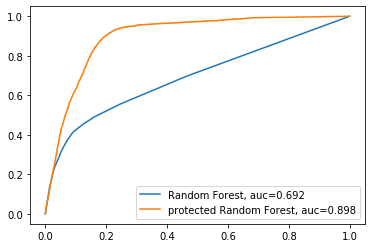

In [23]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, p_pred, pos_label=1)
auc = metrics.roc_auc_score(y_test, p_pred)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(np.around(auc,decimals=3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, p_prime, pos_label=1)
auc = metrics.roc_auc_score(y_test, p_prime)
plt.plot(fpr,tpr,label="protected Random Forest, auc="+str(np.around(auc,decimals=3)))
plt.legend()
# plt.savefig("BM_ROC.pdf", bbox_inches='tight')
plt.show()

## 6 Prediction with limited feedback

Now we assume that feedback is given every $K$th test observation.
This is used in Figure 4.

In [24]:
import time   # for timing
start = time.time()

# Parameters
pi = 0.5  # the prior weight of the passive elementary predictor
Jrates = [10**(-2),10**(-3),10**(-4)]  # the jumping rates
K = 100   # how often feedback is given

NJ = len(Jrates)

# Calibrators were defined in Section 3.

# initializing the predicted probabilities:
p_prime = np.empty(N_test)

# Processing the dataset
P_weight = pi    # amount set aside (passive weight)
A_weight = np.zeros((NJ,Ncal))  # the weight of each active state
A_weight[:,0] = (1-pi)/NJ    # initial weights
for n in range(N_test):  # going through all test observations
  if n%K==0:   # if n is divisible by K
    # Jump mixing starts
    for J_index in range(NJ):
      Capital = np.sum(A_weight[J_index,:])  # active capital for this jumping rate
      Jrate = Jrates[J_index]
      A_weight[J_index,:] = (1-Jrate)*A_weight[J_index,:] + Capital*Jrate/Ncal
    # Jump mixing ends
  ppp = truncate(p_pred[n])   # base prediction
  new_ppp = ppp*P_weight    # initializing the new prediction to its passive component
  for k in range(Ncal):
    cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
    for J_index in range(NJ):
      new_ppp += cal_ppp_k * A_weight[J_index,k]  # accumulating predictions calibrated by the calibrators
  p_prime[n] = new_ppp   # my prediction
  if n%K==0:   # if n is divisible by K
    P_weight *= Bern(ppp,y_test[n])  # updating the passive capital
    for k in range(Ncal):
      cal_ppp_k = my_cal(ppp,k)  # prediction calibrated by the k-th calibrator
      for J_index in range(NJ):
        A_weight[J_index,k] *= Bern(cal_ppp_k,y_test[n])  # updating the active capital
    Capital = P_weight + np.sum(A_weight[:,:])  # the overall weight
    P_weight /= Capital  # normalization of the passive weight
    A_weight[:,:] /= Capital  # normalization of the active weights

cum_loss = 0  # initialization of the loss of the base predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss
for n in range(N_test):
  predicted = Bern(p_pred[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Original:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

cum_loss = 0  # initialization of the loss of the protected predictive system
num_infty = 0 # initialization of the number of infinities
mod_cum_loss = 0 # initialization of the modified loss (not used)
for n in range(N_test):
  predicted = Bern(p_prime[n],y_test[n])
  if predicted==0:
    num_infty += 1
  else:
    cum_loss += -np.log10(predicted)
  mod_cum_loss += -np.log10(truncate(predicted))
print("Protected:",cum_loss,"with",num_infty,"infinities; modified loss:",mod_cum_loss)

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)

Original: 4130.607630292967 with 1492 infinities; modified loss: 7185.116696764476
Protected: 4779.310700268226 with 0 infinities; modified loss: 4779.345854559577
Time elapsed: 2.9884426593780518


## 7 Behaviour of the labels

Now let us see the moving average of the labels, ignoring the objects.
This is for the left panel of Figure S.4 in the supplementary material.

Percentage of successful calls: 0.11698480458295547


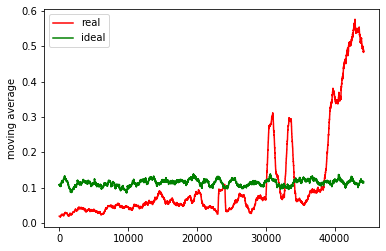

Time elapsed: 0.9953019618988037


In [25]:
window = 1000  # how many labels to average

import time
start = time.time()

N_total = bank.data.shape[0]   # the size of the dataset (recomputing)

# Other view of the data:
y_total = bank.target[0:N_total].astype(int)-1    # vector of all labels (as integers, 0 or 1)

# Simulating artificial (ideal) data:
percentage = np.mean(y_total)
print("Percentage of successful calls:", percentage)
rg = np.random.default_rng(2021)
y_ideal_raw = rg.random(N_total)  # uniformly distributed random numbers
y_ideal = np.empty(N_total)
for n in range(N_total):
  if y_ideal_raw[n]<percentage:
    y_ideal[n] = 1
  else:
    y_ideal[n] = 0

MA_real = np.empty(N_total-window+1)   # initializing the real moving average
MA_ideal = np.empty(N_total-window+1)  # initializing the ideal moving average

for n in range(N_total-window+1):
  MA_real[n] = np.mean(y_total[n:(n+window)])
  MA_ideal[n] = np.mean(y_ideal[n:(n+window)])

plt.plot(MA_real,c='r',label='real')
plt.plot(MA_ideal,c='g',label='ideal')
plt.ylabel('moving average')
plt.legend()
# plt.savefig("BM_MA.pdf", bbox_inches='tight')
plt.show()

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)